# Important Imports

In [1]:
import numpy as np
import pandas as pd

# To split data
from sklearn.model_selection import train_test_split

# To compute accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

from sklearn import metrics
import matplotlib.pyplot as plt

# Classifiers
from sklearn import tree
from sklearn import svm

# To load the data
#### &rarr; We specify that column 0 is the index column
#### &rarr;  We print the first 5 rows

In [3]:
dataFrame = pd.read_csv('data.csv', index_col=0)
dataFrame.head(5)

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


# -------------------------------------------------------------------------------------------------

# Decision Tree

# Preprocessing the data
* We first one-hot-encode the listed features as thet are considered categorical features (from location....diff_sys_hos)
* We pop column result from the dataframe, to insert it back again in the last column in the dataframe
* We store dataframe in numpy array

In [4]:
OneHotEncoded = pd.get_dummies(dataFrame, columns=['location', 'country', 'gender',
                                                   'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5',
                                                   'symptom6',
                                                   'diff_sym_hos'])

# To make result column the last
result_popped = OneHotEncoded.pop('result')
OneHotEncoded.insert(293, 'result', result_popped)

Data = np.array(OneHotEncoded)

# data[0]

# Splitting the data
* We split the data 80% training set and 10% validation set and 10% testing set
* We then split each set to x and y. 

   &rarr; X contains all the columns except column result 
   
   &rarr; Y is the column result

In [5]:
Train_set, Remain_set = train_test_split(Data, train_size=0.8, random_state=81, shuffle=True)
Test_set, Valid_set = train_test_split(Remain_set, test_size=0.5, random_state=81, shuffle=True)

xTrain = Train_set[:, :293]
yTrain = Train_set[:, 293]

xTest = Test_set[:, :293]
yTest = Test_set[:, 293]

xValid = Valid_set[:, :293]
yValid = Valid_set[:, 293]

# To get best Max_Depth using for loop
&rarr; max_depth represents the maximum depth of the tree. If this is not specified in the Decision Tree, the nodes will be expanded until all leaf nodes are pure or until all leaf nodes contain less than min_samples_split.
* In each num in for loop:

  &rarr; We train the Decision tree classifier with the training set
  
  &rarr; Then we predict the outcome by the validation set
  
  &rarr; Then we calculate the accuracy by recall_score, **as our output specifies whether the patient has Covid-19 or not, so    we are concerned more with the false negatives as it has more risk to specify that a patient has not Covid-19, but actually he   has. So the recall should be high**
  
  &rarr; Finally we choose the best max depth and print it

In [6]:
max_depth = [None]
for num in range(3, 293):
    max_depth.append(num)

best_depth = 0
maxAccuracy = 0
for num in max_depth:
    clf = tree.DecisionTreeClassifier(max_depth=num)
    clf.fit(xTrain, yTrain)
    PredictedOutcome = clf.predict(xValid)
    newAccuracy = recall_score(yValid, PredictedOutcome)
    if newAccuracy > maxAccuracy:
        maxAccuracy = newAccuracy
        best_depth = num

print("The best depth is", best_depth)

The best depth is 6


# Train the data
  &rarr; We train the decision tree classifier with the training set
  
  &rarr; Then we predict the outcome by the testing set

In [7]:
clf = tree.DecisionTreeClassifier(max_depth=best_depth)
clf.fit(xTrain, yTrain)
PredictedOutcome = clf.predict(xTest)

# Test the data and show accuracy
  &rarr; We first print the total accuracy by the ready-built function accuracy score
  
  &rarr; Then we print the classification report
  
  &rarr; Then we print the confusion matrix
  
  &rarr; Then we plot the ROC graph and show the auc (area under curve) inside the graph

Accuracy :  96.51162790697676
This is the classification report
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98        73
         1.0       0.86      0.92      0.89        13

    accuracy                           0.97        86
   macro avg       0.92      0.95      0.93        86
weighted avg       0.97      0.97      0.97        86

This is the confusion matrix
 [[71  2]
 [ 1 12]]


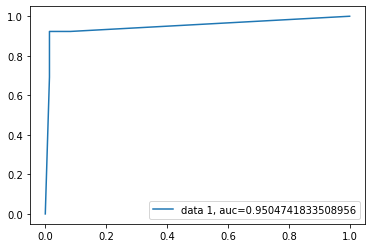

In [8]:
print("Accuracy : ", accuracy_score(yTest, PredictedOutcome) * 100)
print("This is the classification report\n", classification_report(yTest, PredictedOutcome))
print("This is the confusion matrix\n", confusion_matrix(yTest, PredictedOutcome))

y_predict_prob = clf.predict_proba(xTest)[::, 1]
fpr, tpr, _ = metrics.roc_curve(yTest, y_predict_prob)
auc = metrics.roc_auc_score(yTest, y_predict_prob)
plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()

# Visualize the decision tree

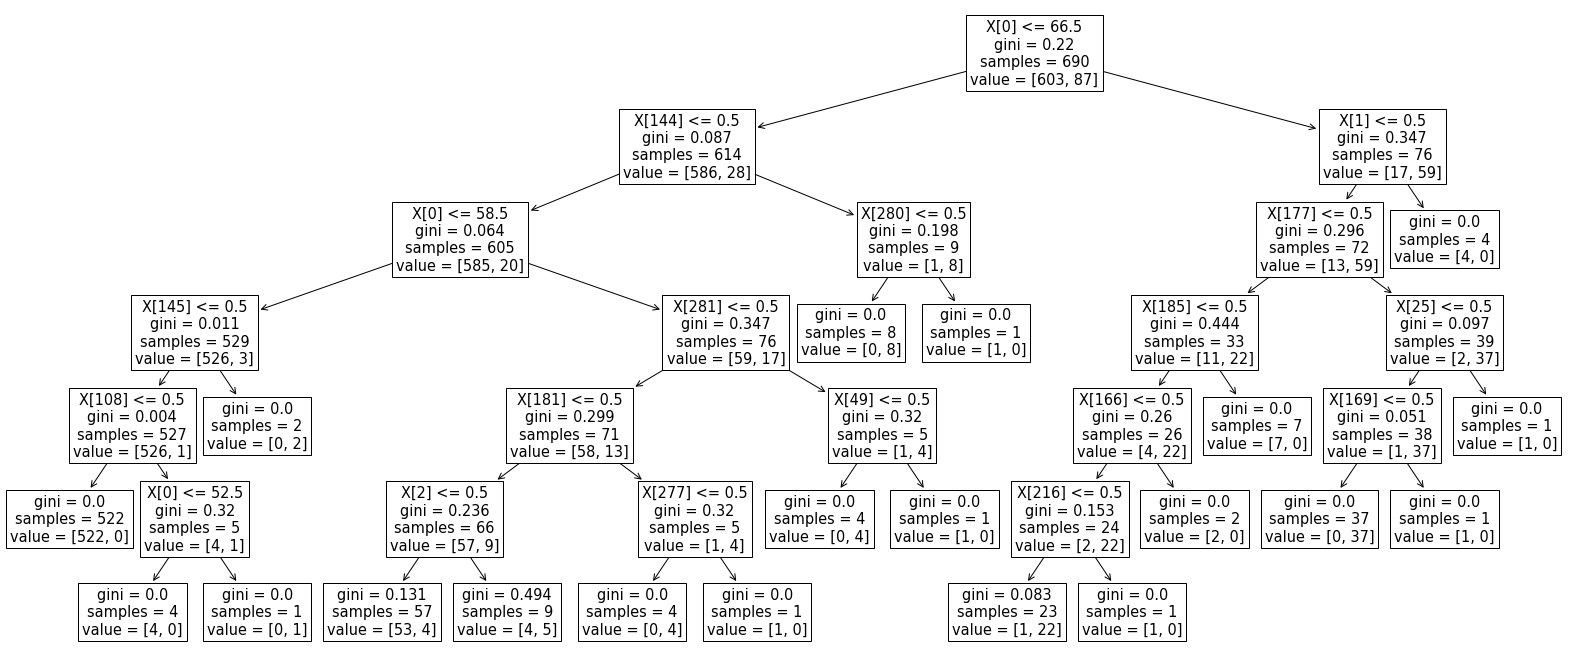

In [9]:
fig, ax = plt.subplots(figsize=(28, 12))
tree.plot_tree(clf, fontsize=14.5)
plt.show()

# -------------------------------------------------------------------------------------------------

# Support Vector Machines

# Preprocessing the data
* We first one-hot-encode the listed features as thet are considered categorical features (from location....diff_sys_hos)
* We pop column result from the dataframe, to insert it back again in the last column in the dataframe
* We store dataframe in numpy array

In [10]:
OneHotEncoded = pd.get_dummies(dataFrame, columns=['location','country','gender',
                                                   'symptom1', 'symptom2', 'symptom3','symptom4', 'symptom5','symptom6',
                                                   'diff_sym_hos'])
# To make result column the last
result_popped = OneHotEncoded.pop('result')
OneHotEncoded.insert(293, 'result', result_popped)

Data = np.array(OneHotEncoded)

# Data[0]

# Splitting the data
* We split the data 80% training set and 10% validation set and 10% testing set
* We then split each set to x and y. 

   &rarr; X contains all the columns except column result 
   
   &rarr; Y is the column result

In [11]:
Train_set, Remain_set = train_test_split(Data, train_size=0.8, random_state=0, shuffle=True)
Test_set, Valid_set = train_test_split(Remain_set, test_size=0.5, random_state=0, shuffle=True)

xTrain = Train_set[:, :293]
yTrain = Train_set[:, 293]

xTest = Test_set[:, :293]
yTest = Test_set[:, 293]

xValid = Valid_set[:, :293]
yValid = Valid_set[:, 293]

# To get best C hyperparameter using for loop
* &rarr; C parameter adds a penalty for each misclassified data point. If c is small, the penalty for misclassified points is low so a decision boundary with a large margin is chosen at the expense of a greater number of misclassifications. If c is large, SVM tries to minimize the number of misclassified examples due to high penalty which results in a decision boundary with a smaller margin.


* &rarr; **0.1 < c < 100**
   
   
* In each C in for loop *(we check the values stated in the array)*:

  &rarr; We train the svm classifier with the training set
  
  &rarr; Then we predict the outcome by the validation set
  
  &rarr; Then we calculate the accuracy by recall_score, **as our output specifies whether the patient has Covid-19 or not, so    we are concerned more with the false negatives as it has more risk to specify that a patient has not Covid-19, but actually he   has. So the recall should be high**
  
  &rarr; Finally we choose the best C and print it

In [12]:
c = []
# Here we want an array to iterate in that contains all the value of hyperparameter range C as written above (0.1 < c < 100)
for num in np.arange(0.1,100,0.1):
    c.append(round(num,1))
best_c = 0.001
maxAccuracy = 0
for num in c:
    svm2 = svm.SVC(C=num)
    svm2.fit(xTrain, yTrain)
    PredictedOutcome = svm2.predict(xValid)
    newAccuracy = recall_score(yValid, PredictedOutcome)
    if newAccuracy > maxAccuracy:
        maxAccuracy = newAccuracy
        best_c = num
print("The best C is", best_c)
c = best_c

The best C is 73.2


# Train the data
  &rarr; We train the svm classifier with the training set
  
  &rarr; Then we predict the outcome by the testing set

In [13]:
svm_Class = svm.SVC(kernel='rbf',C=c, probability=True)
svm_Class.fit(xTrain, yTrain)
PredictedOutcome = svm_Class.predict(xTest)

# Test the data and show accuracy
  &rarr; We first print the total accuracy by the ready-built function accuracy score
  
  &rarr; Then we print the classification report
  
  &rarr; Then we print the confusion matrix
  
  &rarr; Then we plot the ROC graph and show the auc (area under curve) inside the graph

Accuracy :  94.18604651162791
This is the classification report
               precision    recall  f1-score   support

         0.0       0.97      0.96      0.97        76
         1.0       0.73      0.80      0.76        10

    accuracy                           0.94        86
   macro avg       0.85      0.88      0.86        86
weighted avg       0.94      0.94      0.94        86

This is the confusion matrix
 [[73  3]
 [ 2  8]]


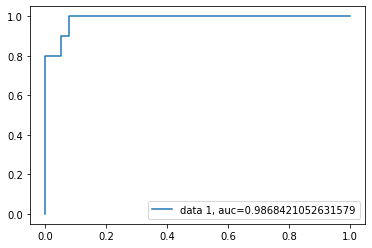

In [14]:
print("Accuracy : ", accuracy_score(yTest, PredictedOutcome) * 100)
print("This is the classification report\n", classification_report(yTest, PredictedOutcome))
print("This is the confusion matrix\n", confusion_matrix(yTest, PredictedOutcome))

y_predict_prob = svm_Class.predict_proba(xTest)[::, 1]
fpr, tpr, _ = metrics.roc_curve(yTest, y_predict_prob)
auc = metrics.roc_auc_score(yTest, y_predict_prob)
plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()